In [0]:
#importing libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stat

In [0]:
df = pd.read_csv("AB_NYC_2019.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [0]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'intercept'],
      dtype='object')

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
new_df = df.drop(['name','id','host_id','host_name','last_review','neighbourhood'], axis=1)
Y = df.price
new_df.head() 

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


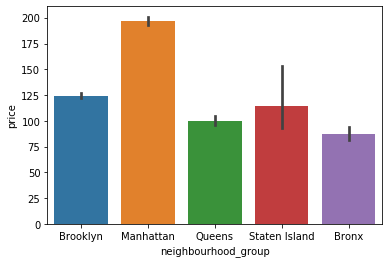

In [0]:
sns.barplot(new_df.neighbourhood_group,df.price)

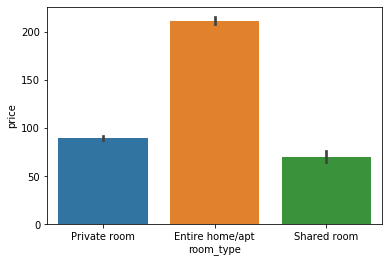

In [0]:
sns.barplot(new_df.room_type,new_df.price)

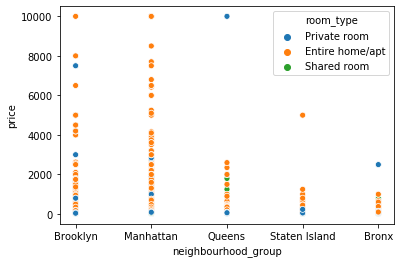

In [0]:
sns.scatterplot(new_df.neighbourhood_group,new_df.price,hue=df.room_type)

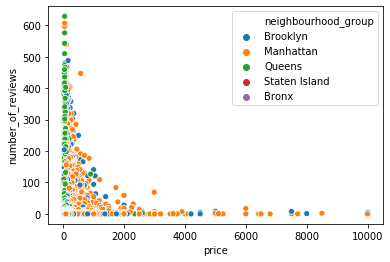

In [0]:
sns.scatterplot(new_df.price,new_df.number_of_reviews,hue=df.neighbourhood_group)

In [0]:
encoded_df=pd.get_dummies(new_df)
encoded_df.shape

(48895, 17)

In [0]:
encoded_df.info()
#categoriaacal features are handled using one hot encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
latitude                             48895 non-null float64
longitude                            48895 non-null float64
price                                48895 non-null int64
minimum_nights                       48895 non-null int64
number_of_reviews                    48895 non-null int64
reviews_per_month                    38843 non-null float64
calculated_host_listings_count       48895 non-null int64
availability_365                     48895 non-null int64
price_log                            48895 non-null float64
neighbourhood_group_Bronx            48895 non-null uint8
neighbourhood_group_Brooklyn         48895 non-null uint8
neighbourhood_group_Manhattan        48895 non-null uint8
neighbourhood_group_Queens           48895 non-null uint8
neighbourhood_group_Staten Island    48895 non-null uint8
room_type_Entire home/apt            48895 non-null uint8
room_type_Pri

In [0]:
encoded_df.isna().sum()
#reviews per month have null values but since reviews says a lot about the prices we can fill null values with mean value of the reviews.

latitude                                 0
longitude                                0
price                                    0
minimum_nights                           0
number_of_reviews                        0
reviews_per_month                    10052
calculated_host_listings_count           0
availability_365                         0
price_log                                0
neighbourhood_group_Bronx                0
neighbourhood_group_Brooklyn             0
neighbourhood_group_Manhattan            0
neighbourhood_group_Queens               0
neighbourhood_group_Staten Island        0
room_type_Entire home/apt                0
room_type_Private room                   0
room_type_Shared room                    0
dtype: int64

In [0]:
mean_review = encoded_df.reviews_per_month.mean()
encoded_df.reviews_per_month.fillna(mean_review,inplace=True)
encoded_df.isnull().sum()
#no null values

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
price_log                            0
neighbourhood_group_Bronx            0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Entire home/apt            0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

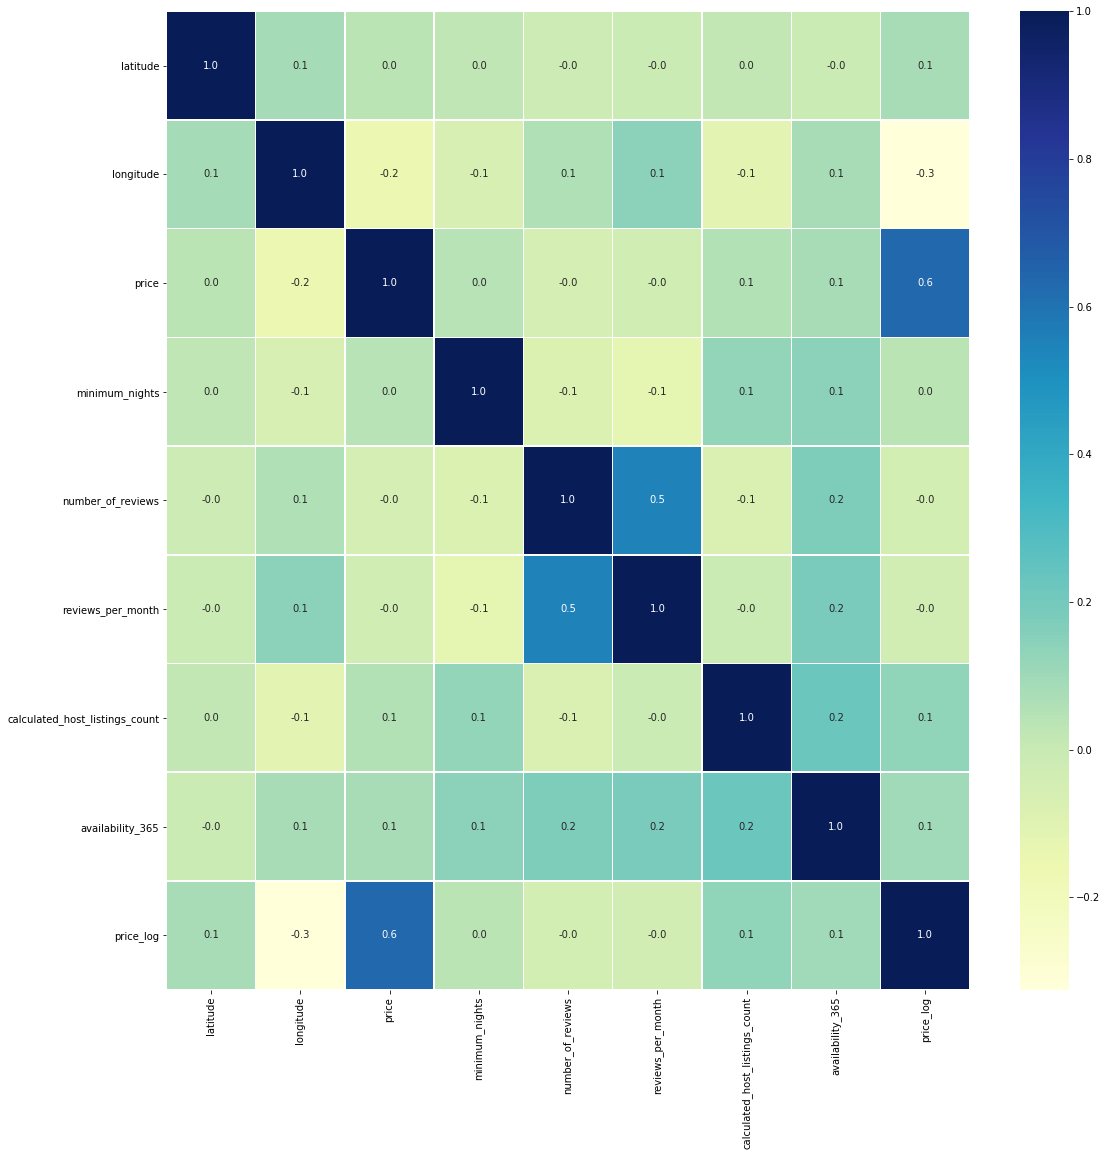

In [0]:
# Check for co-linearity among features and with preidiction feature
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(new_df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlGnBu")


In [0]:
encoded_df.drop(columns=['price'],inplace=True)
encoded_df.shape

(48895, 16)

In [0]:
encoded_df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,1,9,0.210000,6,365,5.010635,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,1,45,0.380000,2,355,5.420535,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,3,0,1.373221,1,365,5.017280,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,1,270,4.640000,1,194,4.499810,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,10,9,0.100000,1,0,4.394449,0,0,1,0,0,1,0,0


In [0]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [0]:
Y = encoded_df.iloc[:,4]

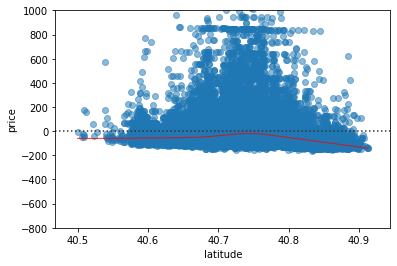

In [0]:
# fig=figsize=(5,5)
sns.residplot(encoded_df.iloc[:,0],Y, 
                          scatter_kws={'alpha': 0.5}, lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylim(-800,1000)
plt.show()


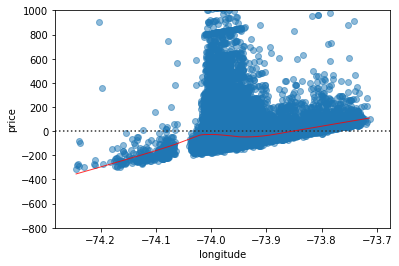

In [0]:
sns.residplot(encoded_df.iloc[:,1],Y, 
                          scatter_kws={'alpha': 0.5}, lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylim(-800,1000)
plt.show()


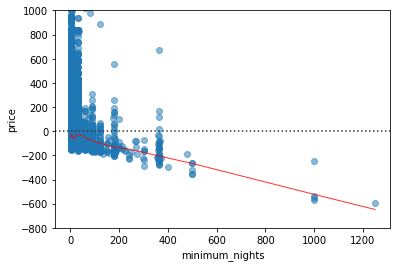

In [0]:
sns.residplot(encoded_df.iloc[:,2],Y, 
                          scatter_kws={'alpha': 0.5}, lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylim(-800,1000)
plt.show()


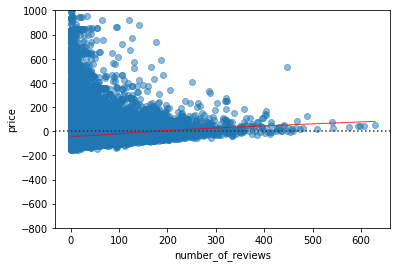

In [0]:
sns.residplot(encoded_df.iloc[:,3],Y, 
                          scatter_kws={'alpha': 0.5}, lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylim(-800,1000)
plt.show()


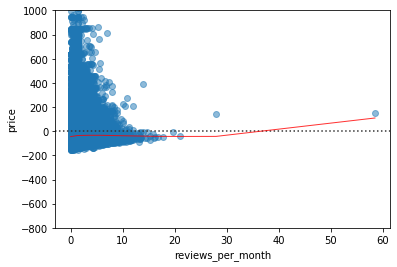

In [0]:
sns.residplot(encoded_df.iloc[:,4],Y, 
                          scatter_kws={'alpha': 0.5}, lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylim(-800,1000)
plt.show()


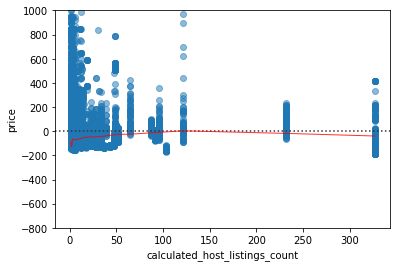

In [0]:
sns.residplot(encoded_df.iloc[:,5],Y, 
                          scatter_kws={'alpha': 0.5}, lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylim(-800,1000)
plt.show()


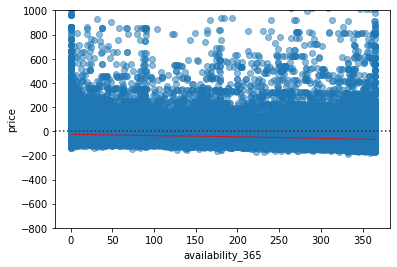

In [0]:
sns.residplot(encoded_df.iloc[:,6],Y, 
                          scatter_kws={'alpha': 0.5}, lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylim(-800,1000)
plt.show()



In [0]:
import statsmodels.api as sm
df['intercept']=1
lm=sm.OLS(new_df['price'],encoded_df[['latitude',	'longitude',	'minimum_nights'	,'number_of_reviews',	'reviews_per_month'	,'calculated_host_listings_count'	,'availability_365','neighbourhood_group_Bronx',	'neighbourhood_group_Brooklyn'	,'neighbourhood_group_Manhattan'	,'neighbourhood_group_Queens'	,'neighbourhood_group_Staten Island'	,'room_type_Entire home/apt',	'room_type_Private room',	'room_type_Shared room']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     410.5
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:34:03   Log-Likelihood:            -3.3485e+05
No. Observations:               48895   AIC:                         6.697e+05
Df Residuals:                   48881   BIC:                         6.699e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latitude                           -198.0261     31.400     -6.307      0.000    -259.571    -136.481
longitude                          -516.6685     36.123    -14.303      0.000    -587.471    -445.866
minimum_nights                       -0.0229      0.052     -0.444      0.657      -0.124       0.078
number_of_reviews                    -0.3546      0.028    -12.789      0.000      -0.409      -0.300
reviews_per_month                     2.8874      0.826      3.494      0.000       1.268       4.507
calculated_host_listings_count       -0.1771      0.033     -5.331      0.000      -0.242      -0.112
availability_365                      0.1922      0.008     22.757      0.000       0.176       0.209
neighbourhood_group_Bronx         -1.124e+04   1206.842     -9.317      0.000   -1.36e+04   -8878.251
neighbourhood_group_Brooklyn      -1.128e+04   1205.912     -9.350      0.000   -1.36e+04   -8911.525
neighbourhood_group_Manhattan     -1.121e+04   1208.158     -9.282      0.000   -1.36e+04   -8846.510
neighbourhood_group_Queens        -1.125e+04   1204.249     -9.339      0.000   -1.36e+04   -8886.691
neighbourhood_group_Staten Island  -1.14e+04   1209.850     -9.420      0.000   -1.38e+04   -9025.735
room_type_Entire home/apt         -1.871e+04   2011.719     -9.300      0.000   -2.27e+04   -1.48e+04
room_type_Private room            -1.882e+04   2011.616     -9.354      0.000   -2.28e+04   -1.49e+04
room_type_Shared room             -1.885e+04   2011.599     -9.372      0.000   -2.28e+04   -1.49e+04
==============================================================================
Omnibus:                   110400.350   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        995222435.832
Skew:                          21.456   Prob(JB):                         0.00
Kurtosis:                     700.611   Cond. No.                     1.94e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.45e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(encoded_df, new_df.price, test_size = 0.2, 
                                                    random_state=5,shuffle='True')


In [0]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_predict = regression_model.predict(X_test)

In [0]:
print("RMSE of the model: ",np.sqrt(((Y_predict-Y_test) ** 2).mean()))

RMSE of the model:  199.9774642639664


Text(0.5, 1.0, 'Distribution of Prices')

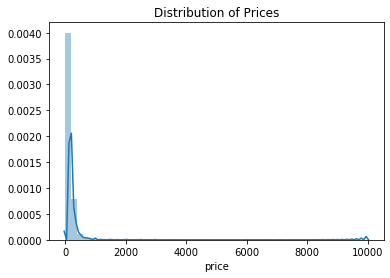

In [0]:
sns.distplot(new_df.price)
plt.title("Distribution of Prices")
plt.show()

In [0]:
new_df['modified_price'] = np.log(new_df.price+1)

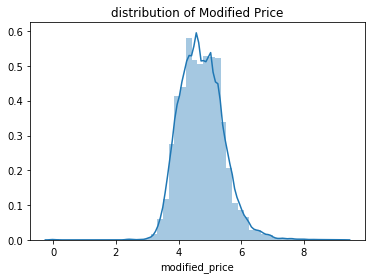

In [0]:
sns.distplot(new_df.modified_price)
plt.title("distribution of Modified Price")
plt.show()

In [0]:
df['intercept']=1
lm_new=sm.OLS(new_df['modified_price'],encoded_df[['latitude','longitude','minimum_nights','number_of_reviews',	'reviews_per_month'	,'calculated_host_listings_count'	,'availability_365'	]])
results = lm_new.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         modified_price   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          3.348e+05
Date:                Sat, 07 Mar 2020   Prob (F-statistic):                        0.00
Time:                        10:11:52   Log-Likelihood:                         -50833.
No. Observations:               48895   AIC:                                  1.017e+05
Df Residuals:                   48888   BIC:                                  1.017e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
latitude                          -0.6576      0.050    -13.164      0.000      -0.756      -0.560
longitude                         -0.4257      0.028    -15.475      0.000      -0.480      -0.372
minimum_nights                  4.531e-05      0.000      0.293      0.769      -0.000       0.000
number_of_reviews                 -0.0006    8.3e-05     -6.752      0.000      -0.001      -0.000
reviews_per_month                 -0.0114      0.002     -4.635      0.000      -0.016      -0.007
calculated_host_listings_count     0.0023   9.75e-05     23.299      0.000       0.002       0.002
availability_365                   0.0005   2.49e-05     18.183      0.000       0.000       0.001
==============================================================================
Omnibus:                     3967.714   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9048.451
Skew:                           0.513   Prob(JB):                         0.00
Kurtosis:                       4.841   Cond. No.                     3.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
nX_train, nX_test, nY_train, nY_test = train_test_split(encoded_df, new_df.modified_price, test_size = 0.2, 
                                                    random_state=5,shuffle='True')


In [0]:
regression_model.fit(nX_train, nY_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
nY_predict = regression_model.predict(nX_test)

In [0]:
print("RMSE of the model after price modification: ",np.sqrt(((nY_predict-nY_test) ** 2).mean()))

RMSE of the model after price modification:  4.398927809859766e-15
